# Copyright Notice
All study materials, exercises, and examples mentioned in these notes are based on DataCamp's courses and resources. These notes are intended solely for personal study and review purposes. They are not intended for commercial use or distribution. All original content and intellectual property rights belong to DataCamp.

These notes contain my own summaries and explanations of the concepts I learned, as well as my own implementations of the exercises. Any direct quotations or closely related material are clearly marked and attributed to DataCamp.

For more detailed information, please refer to the official courses at [DataCamp](https://www.datacamp.com/).

# 3.0 Chapter Intro

To enable embedding applications in production, you'll need an efficient vector storage and querying solution: enter vector databases! You'll learn how vector databases can help scale embedding applications and begin creating and adding to your very own vector databases using Chroma.

In [1]:
# Preparation to load functions from common_functions.py
# and save the api-key for security reason
import importlib
import common_functions
importlib.reload(common_functions)
print(dir(common_functions))

common_functions.py is being imported
common_functions.py is being imported
common_functions.py is being imported
common_functions.py is being imported
['OpenAI', 'OpenAIEmbeddingFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'create_embeddings', 'get_openai_client', 'get_openai_embedding_function', 'print_dict_with_partial_embeddings', 'print_list_of_embeddings']


<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

# 3.1 Vector databases for embedding systems  00:00 - 00:12
Welcome back! In this chapter, you'll learn how to enable use cases with larger datasets by efficiently storing and querying vectors using a vector database.

## 2. Limitations of the current approach  00:12 - 01:00
So far, we've created embeddings using the OpenAI API and stored them in-memory. 
- Because each embedding contains 1536 float values, this results in around 13kB of data for each embedding, which becomes impractical to load for 100,000s or millions of embeddings.
- We also recalculated these embeddings with every query rather than storing them for later use.
- To compare similarity, we computed cosine distances for every embedded document and sorted the results, which are both slow processes that scale linearly.

To enable embeddings applications with larger datasets in production, we'll need a better solution: vector databases!

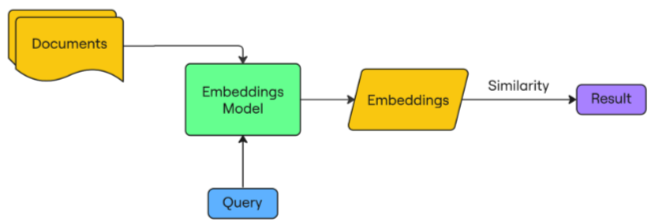

## 3. Vector databases  01:00 - 01:43
Here's a typical embeddings application: the documents to query are embedded and stored in the vector database. A query is sent from the application interface, embedded, and used to query the embeddings in the database. This query can be a semantic search query or data to base recommendations on. Finally, these results are returned by to the user via the application interface. 

Because the embedded documents are stored in the vector database, they don't have to created with each query or stored in-memory. Additionally, due to the architecture of the database, the similarity calculation is computed much more efficiently.

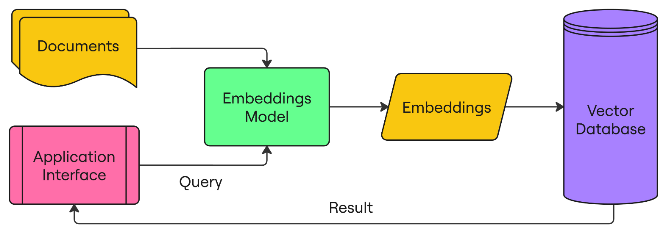

## 4. NoSQL databases vs. `SQL` databases  01:43 - 02:15
The majority of vector databases are what's called NoSQL databases, which contrasts conventional `SQL`, or relational, databases. `SQL` databases store data in tables with rows and columns. NoSQL databases don't use tables, and can be structured in several different ways to enable faster querying. Three examples of NoSQL architectures are shown, including key:value, document, and graph databases.

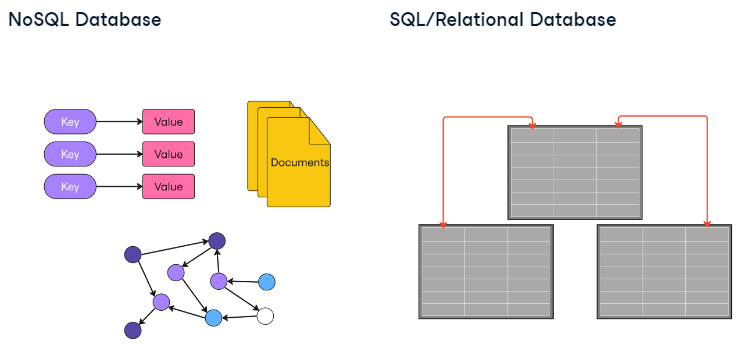

## 5. Components to store  02:15 - 02:55
Vector databases aren't only used for storing the embeddings; the source texts are also commonly stored. For vector databases that don't support this, source texts must be stored in a separate database and referenced with an `ID`. 

Metadata is also stored in the database, including `IDs` and external references, and additional data that could be useful for filtering the query results. It could be tempting to store the source texts in the metadata, but this should be avoided. Metadata must be small to be practically useful, so adding a large amount of text data will greatly degrade performance.

## 6. The vector database landscape  02:55 - 03:13
So what are the options when it comes to vector databases? Fortunately, there are plenty of options out there to suit almost every use case; here are some of the most popular. When deciding which database solution to go with, there are several factors to consider.

1 Image Credit: Yingjun Wu

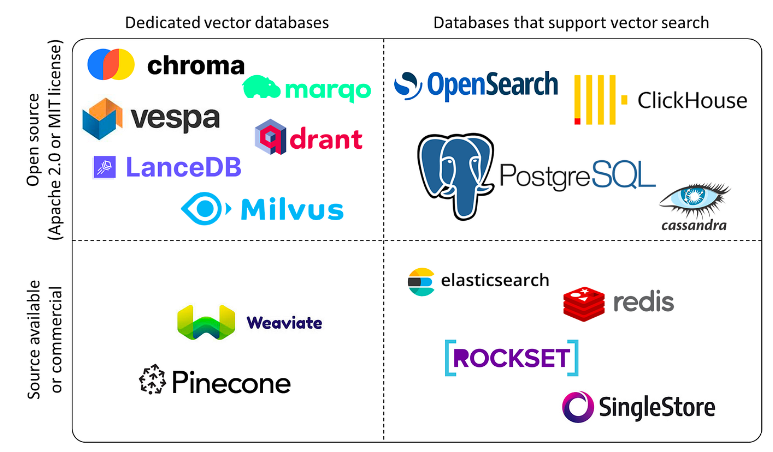

## 7. Which solution is best?  03:13 - 04:27
Vector databases can be managed, which is a turnkey solution that will "take care of itself" while you concentrate on application features. It does come at a price, but can be a sensible investment. Alternatively, you can self-manage and deploy your own server and database, either in the cloud or on-premise. This is usually cheaper, but requires time and expertise. 

Open-source solutions provide greater flexibility in usage, and can be more cost-effective if budgets are tight. In contrast, commercial solutions offer better support, more reliable performance, advanced features, and better regulatory compliance. 

We should also ask ourselves if our data lends itself to a particular database type. As discussed, there are several NoSQL architectures utilized by different database providers. Finally, does the use case depend on specific functionality, like embedding and storing both text and images for a multi-modal application? 

In this course, we'll be using `Chroma`, as it's open-source and quick to set up. At the end of this course, we'll provide resources for learning more about other solutions.

## 8. Let's practice!  04:27 - 04:38
Time for some practice!

# 3.2 To metadata or not to metadata?
You've been hired by Filmflix to create a film recommendation engine using embeddings. The application will embed the film descriptions and store them in a vector database; then, use the similarity to other films user's liked to recommend them new films. But first, you'll need to decide how to structure the data in the vector database.

 Instructions  100XP
- Classify whether the information should be stored as metadata in the vector database or not.

Metadata
- Genre
- Director
- Release year 
- Refrence ID to another table

NonMetadata
- Embedded descriptions
- Source description

Well done! As you'll see later in the chapter, metadata forms a key piece of a production-ready embeddings application.

# 3.3 Choosing a vector database solution
Not all vector databases are made equally, and even more confusingly, what is the best solution for one use case may not be the best for another. This is why it is so important to have a firm grasp of the vector database options out there and the requirements of the use case.

A small AI startup called `Embedded.AI` are developing a cutting-edge platform built on embeddings and vector databases. The platform is designed for organizations to embed and store large volumes of unstructured data, such as text, images, or audio files. They're looking for a cost-effective, customizable solution that their experienced engineers can actively update and maintain.

Which features will their ideal vector database solution have?

Which features will their ideal vector database solution have?

 Answers the question 50XP
Possible Answers
Select all correct answers
- [x] Open source
- [ ] Closed source
- [ ] Managed
- [x] Self-managed
- [x] Support multi-modal storage

Well done!

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

# 3.4 Creating vector databases with ChromaDB  00:00 - 00:04
Time to start getting hands on with ChromaDB!

## 2. Installing ChromaDB  00:04 - 00:34
Chroma comes in 2 flavors: 
- a local mode where everything happens inside Python,
- and a client/server mode where a ChromaDB server is running in a separate process.

Client/Server mode requires running a separate process for the chroma server and is better suited for production systems. We'll only be looking at local mode, which is the simplest way to run Chroma and is well-suited for development and prototyping.

## 3. Connecting to the database  00:34 - 00:53
In order to connect and query the database, we first need to create a client. We import chromadb, and create a persistent client by calling `PersistentClient`. Persistent clients save the database files to disk at the path specified.

In [2]:
# from pydantic_settings import BaseSettings
import chromadb
client = chromadb.PersistentClient(path=r'D:\ProgramData\chromadb')

## 4. Creating a collection  00:53 - 01:33
To add embeddings to the database, we must first create a collection. Collections are analogous to tables, where we can create as many as we want to store our data. To create the collection, we use the `create_collection()` method. When creating a collection, we need to pass the name of our collection, which is used as a reference, and the function for creating the embeddings; here, we specify the OpenAI embedding function and API key. 

In Chroma, and in many other vector databases, a default embedding function is used automatically if one isn't specified.

In [3]:
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction
from common_functions import get_openai_embedding_function

In [ ]:
# Original code
collection = client.create_collection(
    name="my_collection",
    embedding_function=OpenAIEmbeddingFunction(api_key="...")
)

In [ ]:
# Changed by Ryan to hide the api_key
# Create the collection
collection = client.create_collection(
    name="my_collection",
    embedding_function=get_openai_embedding_function()
)

In [4]:
# get the collection
collection = client.get_collection(
    name="my_collection",
    embedding_function=get_openai_embedding_function()
)

## 5. Inspecting collections  01:33 - 01:45
The `list_collections()` method lists all of the collections in the database, so we can verify that our collection was created successfully.

In [7]:
client.list_collections()

[Collection(id=d48c1f8d-86a1-4fb3-9284-b2ffdd5a2106, name=my_collection)]

## 6. Inserting embeddings  01:45 - 02:20
We are now ready to add embeddings into the collection. We can do so with the collection-dot-add method. In this example, we're adding a single document. Chroma will not automatically generate ids for these documents, so they must be specified. Since the collection is already aware of the embedding function, it will embed the source texts automatically using the function specified. Most of the time, we'll insert multiple documents at once, which we can do by passing multiple ids and documents.

In [29]:
# Single document, IDs must be provided, 
collection.add(ids=["my-doc"], documents=["This is the source text"])

In [30]:
# Multiple documents
collection.add(
    ids=["my-doc-1", "my-doc-2"],
    documents=["This is document 1", "This is document 2"]
)

## 7-8. Inspecting a collection  02:20 - 02:42
After inserting documents, we can inspect the collection with two methods: collection-dot-count() will return the total number of documents in the collection.

And collection-dot-peek() will return the first ten items in the collection. As we can see, the embeddings were created automatically when we inserted the texts.

In [31]:
collection.count()

3

In [6]:
# get_openai_client is used to 'hide' the api_key
from common_functions import get_openai_client
from common_functions import create_embeddings
from common_functions import print_list_of_embeddings
from common_functions import print_dict_with_partial_embeddings

In [7]:
print_dict_with_partial_embeddings(collection.peek())

ids: ['my-doc', 'my-doc-1', 'my-doc-2']
embeddings: [
   0.004375990480184555 ,
   -0.0010640477994456887 ,
    ...
   -0.005154683720320463 ,
   -0.016186172142624855 ,
 ]
embeddings: [
   0.009638600051403046 ,
   -0.0025951338466256857 ,
    ...
   -0.006986015010625124 ,
   -0.01732059009373188 ,
 ]
embeddings: [
   0.00023605940805282444 ,
   -0.0007512667798437178 ,
    ...
   -0.018525199964642525 ,
   -0.01053587719798088 ,
 ]
metadatas: [None, None, None]
documents: ['This is the source text', 'This is document 1', 'This is document 2']
uris: None
data: None
included: ['embeddings', 'metadatas', 'documents']


## 9. Retrieving items  02:42 - 02:49
We can also retrieve particular items by their `ID` using the get method.

In [32]:
collection.get(ids='my-doc')

{'ids': ['my-doc'],
 'embeddings': None,
 'metadatas': [None],
 'documents': ['This is the source text'],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents']}

## 10. Netflix dataset  02:49 - 03:21
In the following exercises, we'll insert a dataset of Netflix titles into a Chroma database. For each title, we'll embed a source text including the title, description, and categories. While this is not a massive dataset, we must not forget that each of these texts is going to be sent to the OpenAI embedding endpoint and therefore cost money. 

Before inserting a sizable dataset into a collection, it's important to get an idea of the cost.

## 11. Estimating embedding cost  03:21 - 03:42
OpenAI provides the cost per thousand tokens on their model pricing page, which means we can find the total cost by multiplying this value by the number of tokens in the texts we'll embed and dividing by a thousand. We can count these tokens with OpenAI's tiktoken library.

1 https://openai.com/pricing

In [ ]:
# 'text-embedding-ada-002' costs 0.0001/1k tokens
cost = 0.0001 * len(tokens)/1000

In [ ]:
pip install tiktoken

## 12. Estimating embedding cost  03:42 - 04:47
tiktoken can convert any text into tokens. 

First, we use the `encoding_for_model` function to get a token encoder for the embedding model we're using. 

To calculate the total number of tokens, we use the following Pythonic code. This reads: for each text in documents, encode it using the encoder and take the length to obtain the number of tokens in the text. 

Finally, sum the results. This code is much more concise and efficient than looping through the documents; it just takes a little time to get used to if you're used to looping. 

Finally, we calculate the price by multiplying `total_tokens` by `cost_per_1k_tokens` over 1000, and print the result. 

The full dataset contains about 400,000 tokens and will cost about 4 cents to fully embed. We'll work with a smaller subset in the exercises of the first 1000 titles.

In [76]:
import ast

# Read the content of the file
documents = []
with open('documents.csv', 'r', encoding='utf-8') as file:
    for line in file:
        cleaned_line = line.strip()
        if cleaned_line:  # Make sure not to add blank lines
            documents.append(cleaned_line)

# Print the first few items to verify
for i in range(2):
    print(documents[i])

'Title: Dick Johnson Is Dead (Movie)\nDescription: As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.\nCategories: Documentaries',
'Title: Blood & Water (TV Show)\nDescription: After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.\nCategories: International TV Shows, TV Dramas, TV Mysteries',


In [77]:
print(type(documents))
len(documents)

<class 'list'>


1000

In [17]:
import tiktoken

enc = tiktoken.encoding_for_model("text-embedding-ada-002")

total_tokens = sum(len(enc.encode(text)) for text in documents)

cost_per_1k_tokens = 0.0001

print('Total tokens:', total_tokens)
print('Cost:', cost_per_1k_tokens * total_tokens/1000)

Total tokens: 51226
Cost: 0.005122600000000001


## 13. Let's practice!  04:47 - 04:50
Now it's your turn!

# 3.5 Getting started with ChromaDB
In the following exercises, you'll use a vector database to embed and query 1000 films and TV shows from the Netflix dataset introduced in the video. The goal will be to use this data to generate recommendations based on a search query. To get started, you'll create the database and collection to store the data.

`chromadb` is available for you to use, and the `OpenAIEmbeddingFunction()` has been imported from `chromadb.utils.embedding_functions`.

Instructions 100 XP  
- Create a persistent client to save the database files to disk; you can leave out the file path for these exercises.
- Create a database collection called `netflix_titles` that uses the OpenAI embedding function; you'll need to supply your OpenAI API key here.
- List all of the collections in the database.

In [9]:
# Create a persistant client
client = chromadb.PersistentClient(path=r'D:\ProgramData\chromadb')

# Create a netflix_title collection using the OpenAI Embedding function
collection = client.create_collection(
  name="netflix_titles",
  embedding_function=get_openai_embedding_function()
)

# List the collections
print(client.list_collections())

[Collection(id=14ed801b-ff78-45a2-b273-c5ca1535a1a2, name=netflix_titles), Collection(id=d48c1f8d-86a1-4fb3-9284-b2ffdd5a2106, name=my_collection)]


Congratulations! You've created your very first vector database! Head on over to the next exercise to begin populating it with some data.

# 3.6 Estimating embedding costs with tiktoken
Now that we've created a database and collection to store the Netflix films and `TV` shows, we can begin embedding data.

Before embedding a large dataset, it's important to do a cost estimate to ensure you don't go over any budget restraints. Because OpenAI models are priced by number of tokens inputted, we'll use OpenAI's tiktoken library to count the number of tokens and convert them into a dollar cost.

You've been provided with documents, which is a list containing all of the data to embed. You'll iterate over the list, encode each document, and count the total number of tokens. Finally, you'll use the model's pricing to convert this into a cost.

 Instructions  100XP
- Load the encoder for the text-embedding-ada-002 model.
- Encode each text in documents, and sum the result to find the total number of tokens in the dataset, `total_tokens`.
- Print the total number of tokens and the cost of those tokens using the model's `cost_per_1k_tokens` defined for you.

In [18]:
# Load the encoder for the OpenAI text-embedding-ada-002 model
enc = tiktoken.encoding_for_model("text-embedding-ada-002")

# Encode each text in documents and calculate the total tokens
total_tokens = sum(len(enc.encode(text)) for text in documents)

cost_per_1k_tokens = 0.0001

# Display number of tokens and cost
print('Total tokens:', total_tokens)
print('Cost:', cost_per_1k_tokens * total_tokens/1000)

Total tokens: 51226
Cost: 0.005122600000000001


There you have it! It will cost less than a 1 cent to embed 1000 documents from the Netflix dataset—that's pretty good value for money, especially now we can store them! Now that you've verified that the cost is within budget, time to add the data!

# 3.7 Adding data to the collection
Time to add those Netflix films and `TV` shows to your collection! You've been provided with a list of document `IDs` and texts, stored in ids and documents, respectively, which have been extracted from netflix_titles.csv using the following code:
```
ids = []
documents = []

with open('netflix_titles.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for i, row in enumerate(reader):
        ids.append(row['show_id'])
        text = f"Title: {row['title']} ({row['type']})\nDescription: {row['description']}\nCategories: {row['listed_in']}"
        documents.append(text)
```
As an example of what information will be embedded, here's the first document from `documents`:
```
Title: Dick Johnson Is Dead (Movie)
Description: As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.
Categories: Documentaries
```
All of the necessary functions and packages have been imported, and a persistent client has been created and assigned to `client`.

 Instructions  100XP
- Insert your OpenAI API key to recreate your `netflix_titles` collection.
- Add the documents and their `IDs` to the collection.
- Print the number of documents in collection and the first ten items.

In [22]:
import csv

In [40]:
client.delete_collection("netflix_titles")

In [78]:
ids = []
documents = []

with open('netflix_titles_1000.csv') as csvfile:
  reader = csv.DictReader(csvfile)
  for i, row in enumerate(reader):
    ids.append(row['show_id'])
    text = f"Title: {row['title']} ({row['type']})\nDescription: {row['description']}\nCategories: {row['listed_in']}"
    documents.append(text)

In [79]:
print(ids[:10])
print(documents[:3])

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10']
['Title: Dick Johnson Is Dead (Movie)\nDescription: As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.\nCategories: Documentaries', 'Title: Blood & Water (TV Show)\nDescription: After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.\nCategories: International TV Shows, TV Dramas, TV Mysteries', 'Title: Ganglands (TV Show)\nDescription: To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.\nCategories: Crime TV Shows, International TV Shows, TV Action & Adventure']


In [41]:
# Recreate the netflix_titles collection
collection = client.create_collection(
  name="netflix_titles",
  embedding_function=get_openai_embedding_function()
)

In [43]:
# Add the documents and IDs to the collection
collection.add(ids=ids[:20], documents=documents[:20])

# Print the collection size and first ten items
print(f"No. of documents: {collection.count()}")

No. of documents: 20


In [44]:
print_dict_with_partial_embeddings(collection.peek())

ids: ['s1', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18']
embeddings: [
   -0.005249669309705496 ,
   0.007323771715164185 ,
    ...
   -0.012676501646637917 ,
   -0.02798105962574482 ,
 ]
embeddings: [
   -0.009412353858351707 ,
   -0.020203381776809692 ,
    ...
   -0.026117511093616486 ,
   -0.04148909077048302 ,
 ]
embeddings: [
   -0.002106927800923586 ,
   -0.024169795215129852 ,
    ...
   -0.010790318250656128 ,
   -0.015133632346987724 ,
 ]
embeddings: [
   -0.012836392968893051 ,
   -0.02940075844526291 ,
    ...
   -0.004283204209059477 ,
   -0.006371926981955767 ,
 ]
embeddings: [
   -0.0277238879352808 ,
   -0.015309070236980915 ,
    ...
   -0.013938108459115028 ,
   -0.013709614984691143 ,
 ]
embeddings: [
   -0.024544397369027138 ,
   -0.010044443421065807 ,
    ...
   -0.012799825519323349 ,
   -0.025821123272180557 ,
 ]
embeddings: [
   0.01991296000778675 ,
   -0.011965126730501652 ,
    ...
   -0.028908492997288704 ,
   0.0057890391908586025 ,
 ]
em

Great job! Now that you have the data set up in the database, it's time to learn how you can begin querying it to enable a semantic search or recommendation system. See you there!

In [45]:
collection

Collection(id=581db916-d5d1-4655-852b-e100b34269a2, name=netflix_titles)

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

# 3.8 Querying and updating the database  00:00 - 00:07
We meet again! Let's continue our journey to learn about querying and updating our collection.

## 2. Querying the database  00:07 - 00:35
Similar to what we did manually in the previous chapter, we'll build a semantic search application, but this time, using a vector database. 

The approach is exactly the same: we have a query string and we want to find similar titles in our collection. Previously, we had to embed the query string to get a query vector, which was used to find similar embeddings in the dataset.

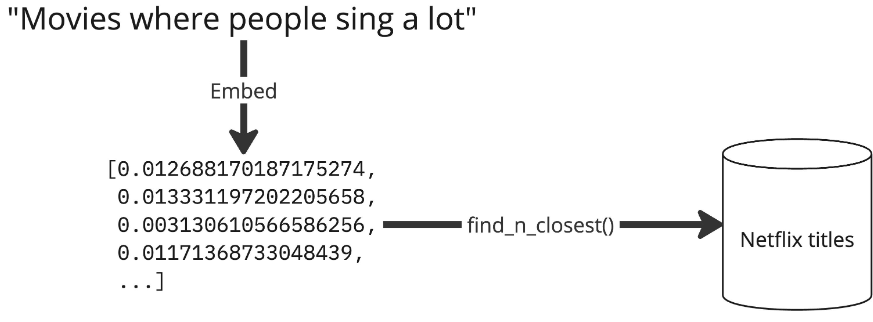

## 3. Querying the database  00:35 - 00:46
With Chroma, we'll let the collection do the embedding, so we can pass our query string directly and Chroma will take care of creating the embedding and performing the search.

## 4. Retrieve the collection  00:46 - 01:15
First, we need to retrieve our collection, which we can do with client-dot-get_collection(), specifying the name of the collection to retrieve. 

Recall that when we created the collection, we specified the embedding function to use, and it's also really important to specify the same function when retrieving the collection. This way, Chroma will use the same embedding function to create the query vector.

In [ ]:
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction
from common_functions import get_openai_embedding_function

In [ ]:
collection = client.get_collection(
  name="netflix_titles",
  embedding_function=get_openai_embedding_function()
)

## 5. Querying the collection  01:15 - 01:44
To query the collection, we call collection-dot-query, passing our query string to `"query_texts"`. Note that this parameter is plural, so even if we have a single query string, we pass a list. To specify how many items to retrieve, we can use the `n_results` parameter. Here's what's returned: it's not the simplest format, so let's break it down.

In [51]:
result = collection.query(
  query_texts=["movies where people sing a lot"],
  n_results=3
)
print(type(result))
print(result)

<class 'dict'>
{'ids': [['s10', 's14', 's13']], 'distances': [[0.4702081464232092, 0.4936304398419284, 0.4945207257385695]], 'metadatas': [[None, None, None]], 'embeddings': None, 'documents': [["Title: The Starling (Movie)\nDescription: A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.\nCategories: Comedies, Dramas", "Title: Confessions of an Invisible Girl (Movie)\nDescription: When the clever but socially-awkward Tetê joins a new school, she'll do anything to fit in. But the queen bee among her classmates has other ideas.\nCategories: Children & Family Movies, Comedies", 'Title: Je Suis Karl (Movie)\nDescription: After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.\nCategories: Dramas, International Movies']], 'uris': None, 'data': None, 'included': ['metadatas', 'documents', 'distances']}


In [52]:
import json
print(json.dumps(result, indent=4))

{
    "ids": [
        [
            "s10",
            "s14",
            "s13"
        ]
    ],
    "distances": [
        [
            0.4702081464232092,
            0.4936304398419284,
            0.4945207257385695
        ]
    ],
    "metadatas": [
        [
            null,
            null,
            null
        ]
    ],
    "embeddings": null,
    "documents": [
        [
            "Title: The Starling (Movie)\nDescription: A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden \u2014 and a husband who's struggling to find a way forward.\nCategories: Comedies, Dramas",
            "Title: Confessions of an Invisible Girl (Movie)\nDescription: When the clever but socially-awkward Tet\u00ea joins a new school, she'll do anything to fit in. But the queen bee among her classmates has other ideas.\nCategories: Children & Family Movies, Comedies",
            "Title: Je Suis Karl (Movie)\nDescription: After most of her family is murd

## 6. Query results (dict)  01:44 - 02:12
First of all, it's a dictionary. It has entries for ids (the ids of the returned items), embeddings, documents, metadatas, and distances of the query results. The embeddings entry is empty, simply because Chroma doesn't return them by default. Aside from this, each of these entries has the same format; let's look at ids.

- `ids`: The ids of the returned items
- `embeddings`: The embeddings of the returned items
- `documents`: The source texts of the returned items
- `metadatas`: The metadatas of the returned items
- `distances`: The distances of the returned items from the query text

## 7. Query results (lists of list)  02:12 - 02:40
ids contains a list of lists. The reason for this is the that the query method accepts a list of query texts - meaning we could use multiple query texts - we just happened to use one. 

Therefore, the results follow the same structure: the first list is the result of the first query. If we had multiple query texts, we would get back as many lists.

## 8. Query results (lists)  02:40 - 03:05
As we can see, this is the same for each entry - they all contain a list of lists. Since we only used a single query text, we are only looking at the first list: the list for the first query text. In this list, we find a format similar to the parameters of the `add()` method: the first id corresponds to the first document, metadatas, and distances.

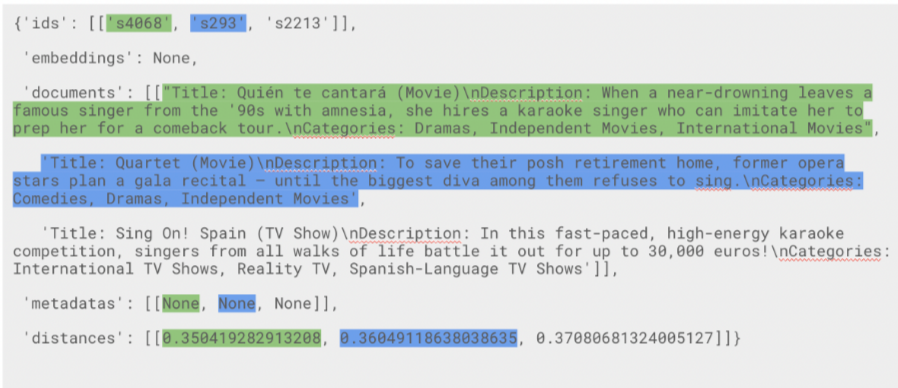

## 9. Updating a collection  03:05 - 03:33
Next, let's see how to update a collection. Items in a collection can be updated with the update method. The syntax is similar to collection-dot-add(); in this example, we'll update the texts for items id-1 and id-2. Once again, Chroma will take care of creating the embeddings using the collection's embedding function.

In [57]:
collection.add(
    ids=["id-1", "id-2"],
    documents=["Test document 1", "Test document 2"]
)
collection.get(ids=["id-1", "id-2"])

{'ids': ['id-1', 'id-2'],
 'embeddings': None,
 'metadatas': [None, None],
 'documents': ['Test document 1', 'Test document 2'],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents']}

In [58]:
collection.update(
    ids=["id-1", "id-2"],
    documents=["Test document 111", "Test document 222"]
)
collection.get(ids=["id-1", "id-2"])

{'ids': ['id-1', 'id-2'],
 'embeddings': None,
 'metadatas': [None, None],
 'documents': ['Test document 111', 'Test document 222'],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents']}

## 10. Upserting a collection  03:33 - 03:52
Alternatively, if we're not sure if the `IDs` are already present in the table, use the upsert method. upsert will add the `IDs` to the collection if they aren't present, and update them if they are - a combination of the update and add methods.

In [59]:
collection.upsert(
    ids=["id-1", "id-2"],
    documents=["Test document 11111", "Test document 22222"]
)
collection.get(ids=["id-1", "id-2"])

{'ids': ['id-1', 'id-2'],
 'embeddings': None,
 'metadatas': [None, None],
 'documents': ['Test document 11111', 'Test document 22222'],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents']}

## 11. Deleting  03:52 - 04:14
Similarly, we can delete from a collection using the collection-dot-delete() method and specifying the ids of the items to remove. 

Finally, if we want to completely empty the whole database (that means all collections and items), you can use client-dot-reset().

In [60]:
collection.delete(ids=["id-1", "id-2"])
collection.get(ids=["id-1", "id-2"])

{'ids': [],
 'embeddings': None,
 'metadatas': [],
 'documents': [],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents']}

In [ ]:
client.reset()

## 12. Let's practice!  04:14 - 04:17
Time to put this into practice!

# 3.9 Querying the Netflix collection
Now that you've created and populated the `netflix_titles` collection, it's time to query it!

As a first trial, you'll use it to provide recommendations for films and `TV` shows about dogs to one of your colleagues who loves dogs!

The `netflix_titles` collection is still available to use, and `OpenAIEmbeddingFunction()` has been imported.

 Instructions  100XP
- Retrieve the `netflix_titles` collection, specifying the OpenAI embedding function so the query is embedded using the same function as the documents.
- Query the collection for "films about dogs" and return three results.

In [61]:
# Retrieve the netflix_titles collection
collection = client.get_collection(
  name="netflix_titles",
  embedding_function=get_openai_embedding_function()
)

# Query the collection for "films about dogs"
result = collection.query(
  query_texts=["films about dogs"],
  n_results=3
)

print(result)

{'ids': [['s10', 's15', 's7']], 'distances': [[0.4341980434738472, 0.4383302628998982, 0.45529314360984297]], 'metadatas': [[None, None, None]], 'embeddings': None, 'documents': [["Title: The Starling (Movie)\nDescription: A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.\nCategories: Comedies, Dramas", 'Title: Crime Stories: India Detectives (TV Show)\nDescription: Cameras following Bengaluru police on the job offer a rare glimpse into the complex and challenging inner workings of four major crime investigations.\nCategories: British TV Shows, Crime TV Shows, Docuseries', "Title: My Little Pony: A New Generation (Movie)\nDescription: Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it.\nCategories: Children & Family Movies"]], 'uris': None, 'data': None, 'included': ['metadatas', 'docu

Great work! If you take a look at the top three results, you can see that they are definitely dog-centric! It's important to remember to always specify the same embedding function when querying as was used to embed the documents; otherwise, your recommendations will likely be untrustworthy.

In the next exercise, you'll practice updating and deleting items from the database, so you can keep your data sources up-to-date and relevant.

# 3.10 Updating and deleting items from a collection
Just because the documents have been stored away in a vector database, that doesn't mean that you can't make changes to add to the collection or update existing items.

In this exercise, you've been provided with two new Netflix titles stored in `new_data`:
```
[{"id": `"s1001"`, `"document"`: "Title: Cats & Dogs (Movie)
Description: A look at the top-secret, high-tech espionage war going on between cats and dogs, of which their human owners are blissfully unaware."},
{"id": `"s6884"`, `"document"`: 'Title: Goosebumps 2: Haunted Halloween (Movie)
Description: Three teens spend their Halloween trying to stop a magical book, which brings characters from the `"Goosebumps"` novels to life.
Categories: Children & Family Movies, Comedies'}]
```
You'll either add or update these `IDs` in the database depending on whether they're already present in the collection.

 Instructions  100XP
- Retrieve the `netflix_titles` collection.
- Extract the `IDs` and documents from `new_data`, and use a single method to update them in the `netflix_titles` collection if they already exist and add them if they don't.
- After you've added/updated the items, delete the item with `ID` 's95'.

In [62]:
new_data = [{'id': 's1001',
  'document': 'Title: Cats & Dogs (Movie)\nDescription: A look at the top-secret, high-tech espionage war going on between cats and dogs, of which their human owners are blissfully unaware.'},
 {'id': 's6884',
  'document': 'Title: Goosebumps 2: Haunted Halloween (Movie)\nDescription: Three teens spend their Halloween trying to stop a magical book, which brings characters from the "Goosebumps" novels to life.\nCategories: Children & Family Movies, Comedies'}]
print(type(new_data))

<class 'list'>


In [63]:
# Extract the list of ids
ids = [item['id'] for item in new_data]

# Extract the list of documents
documents = [item['document'] for item in new_data]

# Print the results
print("IDs:", ids)
print("Documents:", documents)

IDs: ['s1001', 's6884']
Documents: ['Title: Cats & Dogs (Movie)\nDescription: A look at the top-secret, high-tech espionage war going on between cats and dogs, of which their human owners are blissfully unaware.', 'Title: Goosebumps 2: Haunted Halloween (Movie)\nDescription: Three teens spend their Halloween trying to stop a magical book, which brings characters from the "Goosebumps" novels to life.\nCategories: Children & Family Movies, Comedies']


In [66]:
# The netflix_titles collection retrieved already

# Update or add the new documents
collection.upsert(
    ids=[item['id'] for item in new_data],
    documents=[item['document'] for item in new_data]
)

# Delete the item with ID "s19", not "s95" which doesn't exist in 'collection'
collection.delete(ids=["s19"])

result = collection.query(
    query_texts=["films about dogs"],
    n_results=3
)
print(result)

{'ids': [['s1001', 's10', 's15']], 'distances': [[0.2768814019330038, 0.4341980434738472, 0.4383302628998982]], 'metadatas': [[None, None, None]], 'embeddings': None, 'documents': [['Title: Cats & Dogs (Movie)\nDescription: A look at the top-secret, high-tech espionage war going on between cats and dogs, of which their human owners are blissfully unaware.', "Title: The Starling (Movie)\nDescription: A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.\nCategories: Comedies, Dramas", 'Title: Crime Stories: India Detectives (TV Show)\nDescription: Cameras following Bengaluru police on the job offer a rare glimpse into the complex and challenging inner workings of four major crime investigations.\nCategories: British TV Shows, Crime TV Shows, Docuseries']], 'uris': None, 'data': None, 'included': ['metadatas', 'documents', 'distances']}


Nice job! Notice that with your updates to the collection, the recommendations changed! In the next lesson, you'll learn how to send multiple queries at once, and how to add metadata for filtering results. See you there!

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

# 3.11 Multiple queries and filtering  00:00 - 00:13
Hi again! In this final lesson, we'll take a look at more advanced ways to use Chroma by performing multiple queries and filtering with metadatas. Let's dive in!

## 2. Movie recommendations based on multiple datapoints  00:13 - 00:48
In the previous chapter, we used embeddings to make recommendations based on multiple data points. Let's do the same with the Netflix dataset and Chroma. 

We'll recommend movies related to other titles that a user has seen. 

Let's assume a user has seen: 
- Terrifier (id: `s8170`), which is a horror film, -
- and Strawberry Shortcake: Berry Bitty Adventures (id: `s8103`), a kid's `TV` show.

It's an odd combination, but hopefully it will help differentiate the recommendations.

## 3. Multiple query texts  00:48 - 01:21
Similarly to our previous implementation, we'll use the embedded texts of the reference items as queries. First, we're using collection-dot-get to retrieve both of our reference texts. Notice that we're only extracting and storing the documents from these items in `reference_texts`. Since collection-dot-query supports multiple query texts, we can pass our `reference_texts` directly; we'll ask for three results.

In [67]:
reference_ids = ['s1', 's11']

reference_texts = collection.get(ids=reference_ids)["documents"]

result = collection.query(
    query_texts=reference_texts,
    n_results=3
)

## 4. Multiple query texts result  01:21 - 02:16
With multiple query texts, we still get back a single dictionary. The difference is that we now get back multiple lists inside each entry's list. 

Looking at documents, for instance, we see a first list that matches our horror movie and a second list that seems to match the children's title. Even though we asked for 3 results, we're getting 6: three for each query text. 

Notice how the titles we used in the query were most highly recommended, which makes sense, as they are the most similar to the query. These could be removed in postprocessing by extracting the documents from the documents key and filtering out documents that are also in the `reference_texts`. Another great way of filtering results is by utilizing metadata.

In [68]:
print(result)

{'ids': [['s1', 's13', 's10'], ['s11', 's3', 's15']], 'distances': [[0.0, 0.4149927166863576, 0.4423896352942598], [0.0002440092546025191, 0.28637232518650724, 0.35644574261274103]], 'metadatas': [[None, None, None], [None, None, None]], 'embeddings': None, 'documents': [['Title: Dick Johnson Is Dead (Movie)\nDescription: As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.\nCategories: Documentaries', 'Title: Je Suis Karl (Movie)\nDescription: After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.\nCategories: Dramas, International Movies', "Title: The Starling (Movie)\nDescription: A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.\nCategories: Comedies, Dramas"], ['Title: Vendetta: Truth, Lies and Th

## 5. Adding metadata  02:16 - 03:04
So far, we've only worked with the `IDs` and `documents` from the `netflix_titles` `CSV`, but additional information, like the type (whether the title is a film or `TV` show) and `release_year` is also available. This data could be very useful if, for example, we only wanted to recommend films released recently. 

We've edited the code to load the `CSV` by creating a list to store the metadatas, and populating it with the type and `release_year` from each row of the file, stored together in a dictionary. Like before, we also create a list of `IDs` so we can add the metadatas to the existing items.

## 6. Adding and querying metadatas  03:04 - 03:31
We can update the items with their metadatas using the update method, this time, specifying the metadatas argument. We can now use metadatas to filter our query. We are going to make the same search as before, but we'll include a where clause to indicate we only want to retrieve items where the `"type"` metadata is `"Movie"`.

In [ ]:
collection.update(ids=ids, metadatas=metadatas)

In [69]:
result = collection.query(
    query_texts=reference_texts,
    n_results=3,
    where={"type":"Movie"}
)
print(result)

{'ids': [[], []], 'distances': [[], []], 'metadatas': [[], []], 'embeddings': None, 'documents': [[], []], 'uris': None, 'data': None, 'included': ['metadatas', 'documents', 'distances']}


## 7. Where operators  03:31 - 03:54
The where filter we used here is actually a shortcut to mean `"equals"`, which we can define explicitly using another dictionary with the `$eq` key. There are a few operators we can use to support different comparisons, including greater, less than, and not equal to.

In [ ]:
where = {
    "type": {
        "$eq": "Movie"
    }
}

List of operators:
- `$eq` - equal to (string, int, float)
- `$ne` - not equal to (string, int, float)
- `$gt` - greater than (int, float)
- `$gte` - greater than or equal to (int, float)
- `$lt` - less than (int, float)
- `$lte` - less than or equal to (string, int, float)

## 8. Multiple where filters  03:54 - 04:26
Finally, where filters can be combined with logical operators. In our case, we want titles of type movie `AND` released after a certain year. To do this, we combine two where filters with an `"$and"` operator: type equals `"movie"` `AND` `release_year` greater than 2020. 

To filter for results that meet at least one condition, we can use `$or` instead of `$and`.

In [ ]:
where = {
    "$and": [
        {"type": 
            {"$eq": "Movie"}
        },
        {"release_year": 
            {"$gt": 2020}
        }
    ]
}

## 9. Results  04:26 - 04:33
There we have it: our recommendations now only include movies released after 2020.

## 10. Let's practice!  04:33 - 04:37
And now, it's your turn!

# 3.12 Querying with multiple texts
In many cases, you'll want to query the vector database using multiple query texts. Recall that these query texts are embedded using the same embedding function as when the documents were added.

In this exercise, you'll use the documents from two `IDs` in the `netflix_titles` collection to query the rest of the collection, returning the most similar results as recommendations.

The `netflix_titles` collection is still available to use, and `OpenAIEmbeddingFunction()` has been imported.

 Instructions  100XP
- Retrieve the `netflix_titles` collection.
- Retrieve the documents from the collection for the `IDs` in `reference_ids`.
- Query the collection using `reference_texts` to return three results for each query.

In [82]:
ids = []
documents = []

with open('netflix_titles_1000.csv') as csvfile:
  reader = csv.DictReader(csvfile)
  for i, row in enumerate(reader):
    ids.append(row['show_id'])
    text = f"Title: {row['title']} ({row['type']})\nDescription: {row['description']}\nCategories: {row['listed_in']}"
    documents.append(text)

In [81]:
documents[-2:]

['Title: Searching For Sheela (Movie)\nDescription: Journalists and fans await Ma Anand Sheela as the infamous former Rajneesh commune’s spokesperson returns to India after decades for an interview tour.\nCategories: Documentaries, International Movies',
 'Title: Stowaway (Movie)\nDescription: A three-person crew on a mission to Mars faces an impossible choice when an unplanned passenger jeopardizes the lives of everyone on board.\nCategories: Dramas, International Movies, Thrillers']

In [83]:
reference_ids = ['s999', 's1000']

# Retrieve the documents for the reference_ids
reference_texts = documents[-2:]

# Query using reference_texts
result = collection.query(
    query_texts=reference_texts,
    n_results=3
)

print(result['documents'])

[['Title: Je Suis Karl (Movie)\nDescription: After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.\nCategories: Dramas, International Movies', 'Title: Crime Stories: India Detectives (TV Show)\nDescription: Cameras following Bengaluru police on the job offer a rare glimpse into the complex and challenging inner workings of four major crime investigations.\nCategories: British TV Shows, Crime TV Shows, Docuseries', "Title: Confessions of an Invisible Girl (Movie)\nDescription: When the clever but socially-awkward Tetê joins a new school, she'll do anything to fit in. But the queen bee among her classmates has other ideas.\nCategories: Children & Family Movies, Comedies"], ["Title: The Starling (Movie)\nDescription: A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.\nCategories: Comedies, Dramas", 'Tit

Nice work! The first title mentioned in each list is the reference text, and the other two are the top 2 suggestions based on their semantic similarity.

# 3.13 Filtering using metadata
Having metadata available to use in the database can unlock the ability to more easily filter results based on additional conditions. Imagine that the film recommendations you've be creating could access the user's set preferences and use those to further filter the results.

In this exercise, you'll be using additional metadata to filter your Netflix film recommendations. The `netflix_titles` collection has been updated to add metadatas to each title, including the `'rating'`, the age rating given to the title, and `'release_year'`, the year the title was initially released.

Here's a preview of an updated item:
```
{'ids': ['s999'],
`'embeddings'`: None,
`'metadatas'`: [{'rating': `'TV-14'`, `'release_year'`: 2021}],
`'documents'`: ['Title: Searching For Sheela (Movie)
Description: Journalists and fans await Ma Anand Sheela as the infamous former Rajneesh commune’s spokesperson returns to India after decades for an interview tour.
Categories: Documentaries, International Movies'],
`'uris'`: None,
`'data'`: None}
```
 Instructions  100XP
- Retrieve the `netflix_titles` collection.
- Query two results from the collection using `reference_texts`.
- Filter the results for titles with a `'G'` rating that were also released before 2019.

In [84]:
reference_texts = ["children's story about a car", "lions"]

# Query two results using reference_texts
result = collection.query(
  query_texts = reference_texts,
  n_results = 2,
  # Filter for titles with a G rating released before 2019
  where = {
    "$and": [
        {"rating": 
        	{"$eq": "G"}
        },
        {"release_year": 
         	{"$lt": 2019}
        }
    ]
  }
)

Congratulations! You've made it to the end of the course, and what a way to finish it off! Being able to flexibly filter your results means that you can make your recommendations even more specific to user's preferences.

In the final video, before we say a final farewell, we'll provide extra resources to continue to progress on your journey to becoming an embeddings and vector databases pro!

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

# 3.15 Congratulations!  00:00 - 00:10
Congratulations on making it to the end of the course! Let's recap what you've learned and finish with some resources to continue your learning journey.

## 2. Chapter 1 - What are Embeddings?  00:10 - 00:37
In Chapter 1, you learned that embeddings are vector, or numerical, representations of text that capture its semantic meaning. You used OpenAI's embedding model to create these vector representations, and computed the cosine distance to compare the similarity between texts. This unlocked applications like semantic search and recommendation engines that could relate text by their semantic meaning.

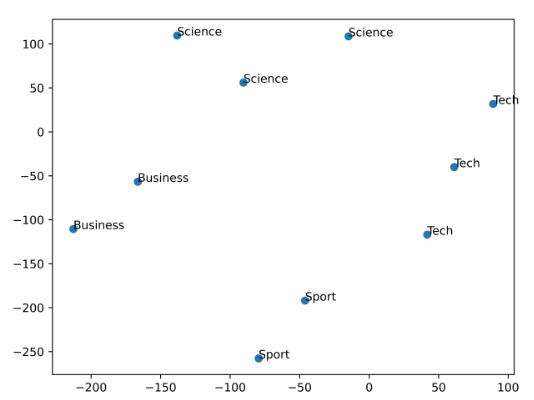

## 3. Chapter 2 - Embeddings for AI Applications  00:37 - 00:55
In Chapter 2, you began using the OpenAI embedding model to enable real-world use cases, including semantic search and recommendation engines. You also saw how embeddings can be used for classification tasks, including sentiment analysis and categorization.

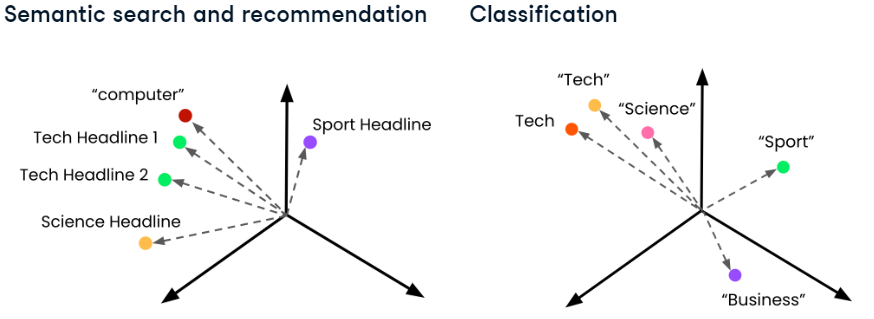

## 4. Chapter 3 - Vector Databases  00:55 - 01:12
Finally, in Chapter 3, you took a big step towards creating a production system by learning about vector databases. You learned how to use Chroma to embed, store, update, and query vectors in a more reproducible and efficient way.

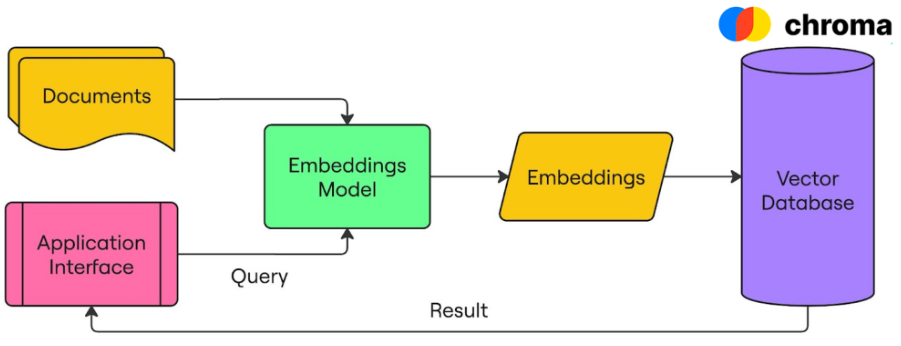

## 5. Where next?  01:12 - 02:00
So what's next? Luckily, `DataCamp` has a ton of resources for you to continue your journey. 

For enterprise companies with more funds or start-ups looking to move quickly to capture demand, a cloud-based, managed vector database could be a good option. Two of the most popular are 
- Pinecone: Semantic Search with Pinecone
- Weaviate: Vector Database for Data Science with Weaviate in Python

and you can learn about both right here on `DataCamp`! 

For many AI applications, including chatbots, embeddings and vector databases are only a part of a larger system, which may also include large language models (or LLMs). 

`LangChain` is a great framework to tie all of these pieces together under a single, unified syntax, so check out these resources out if you're interested in learning more!
- Developing LLM Applications with LangChain

## 6. Let's practice!  02:00 - 02:07
Congratulations, again! Best of luck on the rest of your learning journey!

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>